# Loading MNIST dataset

In [4]:
from tensorflow import keras

train, test = keras.datasets.mnist.load_data()

x_train, _ = train
x_test, _ = test

# Preprocessing

In [5]:
# Reformat dataset
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
import tensorflow as tf

# Shuffle and split dataset into batches
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(64)

# Training

In [20]:
from rbm import RBM
import numpy as np

# Hyperparameters
epochs = 10
alpha = 0.01

model = RBM(visible_units=784, hidden_units=64)

def run(dataset, train=True):
    mean_cost = []
    for _, batch in enumerate(dataset):
        cost = model.train(batch, alpha) if train else model.evaluate(batch)
        mean_cost.append(cost)

    return np.mean(mean_cost)

End of epoch 0 with loss 0.105567224
End of epoch 1 with loss 0.08873418
End of epoch 2 with loss 0.086894736
End of epoch 3 with loss 0.08639962
End of epoch 4 with loss 0.08614277
End of epoch 5 with loss 0.08595771
End of epoch 6 with loss 0.08491547
End of epoch 7 with loss 0.08360232
End of epoch 8 with loss 0.082988635
End of epoch 9 with loss 0.08292304


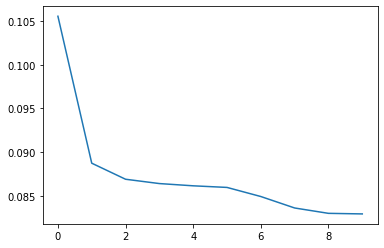

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

progress = []
for epoch in range(epochs):
    loss = run(train_dataset)
    progress.append(loss)
    print('End of epoch %d with loss %s' % (epoch, loss))

plt.plot(progress)

# Evaluation

In [10]:
print('Evaluation loss %s' % (run(test_dataset, train=False)))

Evaluation loss 0.07789127


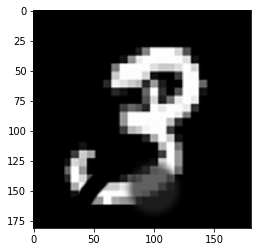

In [11]:
from PIL import Image

img = Image.open('./imgs/3.jpg')

plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(img, cmap="gray")
plt.show()

## Pre-sample image reconstruction

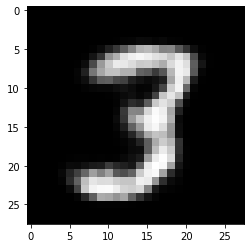

In [22]:
from imgs.utils import tile_raster_images
from rbm import PredictedOutput

sample_case = np.array(img.convert('I').resize((28, 28))).ravel().reshape((1, -1))/255.0
non_sample, sampled = model.predict(sample_case, predict_output=PredictedOutput.visible)

img = Image.fromarray(tile_raster_images(X=non_sample, img_shape=(28, 28), tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.imshow(img, cmap="gray")
plt.show()

## Sampled image reconstructed

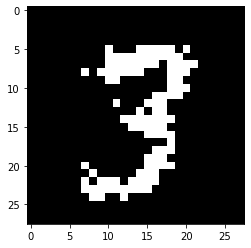

In [23]:
img = Image.fromarray(tile_raster_images(X=sampled, img_shape=(28, 28), tile_shape=(1, 1), tile_spacing=(1, 1)))

plt.imshow(img, cmap="gray")
plt.show()